# Answer 1: Views About the Problem Statement

- **Context and Company Background:** TechWorks Consulting, a company specializing in IT talent recruitment, and highlights its unique approach to matching skilled IT professionals with job opportunities.

- **About Dataset:** The Dataset conatins information about colleges, cities, roles, previous experience, and salary. This information will be used to train and test the predictive model.

- **Project Task:** The primary objective is to perform a regression task, where the aim is to predict a continuous variable, specifically the salary of newly hired employees based on several factors such as college tier, city type, role, previous CTC, job changes, graduation marks, and experience in months.

- **Role of Statistics in this project:** The role of statistics is to build and check the accuracy of the model.

- **Data Preprocessing:** Data Preprocessing is most important task as it involves tasks like handling missing values, outliers, categorical variables, normalization, and feature selection.

- **Summary:** The problem statement is clear and well-defined. It is about Techworks Consultancy, a company specializing in IT recruitment. It involves predicting the salary of newly hired employees based on various factors such as college tier, city type, role, previous CTC, job changes, graduation marks, and experience in months. This is a classic regression problem where we need to determine a continuous variable (salary) based on multiple features.



# Answer 2: Creating a Salary Prediction Model: A Systematic Approach
- **Data Understanding:**
  - Inspect the dataset to understand the columns and their respective data types.
  - Identify any missing values or outliers that need to be handled.
- **Data Preprocessing:**
  - Convert categorical variables into numerical values:
    - Convert college names to numerical values based on tiers.
    - Convert city type to numerical values (e.g., Metro = 1, Non-metro = 0).
    - Create dummy variables for the 'Role' column.
  - Handling Missing Values: Handle missing values by either imputing them or removing rows/columns with excessive missing data.
  - Handling Outliers: Identify and handle outliers which could skew the model's performance.
  - Normalizing Features: Normalize/standardize numerical features to ensure they are on a similar scale.
  - Feature Selection: Use statistical techniques such as Lasso, Ridge, or correlation analysis to select the most relevant features for salary prediction.
- **Performing Exploratory Data Analysis (EDA)**
  - Visualize the relationships between the target variable (salary) and the features.
  - Check for multicollinearity between features.
- **Model Selection:**
    - Choose different regression models (e.g., Linear Regression, Multi Linear Regression) to build and evaluate the predictive models.
- **Model Training and Evaluation:**
    - Split the dataset into training and testing sets to train the models and assess their performance.
    - Use appropriate evaluation metrics like Mean Squared Error (MSE), R-squared, and Mean Absolute Error (MAE) to measure the model's accuracy.
    - Experiment with different hyperparameters for each model and use cross-validation to avoid overfitting.
- **Model Comparison:**
    - Compare the performance of different models and select the one with the best accuracy and generalization.
- **Further Improvement:**
    - Consider additional techniques for model improvement, such as feature engineering, hyperparameter tuning, and ensemble methods.
- **Final Deployment:**
    - Train the final model on the entire dataset.
    - Save the model for future predictions.

# Answer 3: The available ML model options had to perform on this task
#### In the task of predicting employee salary at TechWorks Consulting, there are several machine learning model options available for regression tasks. The choice of the model depends on various factors, including the nature of the data, the complexity of the problem, the need for model interpretability, and lastly the performance of the model. Here are some of the available ML model options:
**1. Linear Regression:**
- Linear regression is a simple and interpretable model that assumes a linear relationship between the features and the target variable (salary). It's a good starting point and can provide baseline performance.

**2. Ridge Regression and Lasso Regression:**
- Ridge and Lasso regression are regularization techniques that can be used to handle multicollinearity and prevent overfitting. They are variants of linear regression that add regularization terms to the cost function.

**3. Decision Trees:**
- Decision tree-based models, like Random Forest and Gradient Boosting, are capable of capturing non-linear relationships in the data. They can handle both numerical and categorical features and automatically deal with feature importance.

**4. K-Nearest Neighbors (KNN):**
- KNN is a non-parametric method that makes predictions based on the average of the 'k' nearest data points. It can be effective for small to medium-sized datasets.

**5. Polynomial Regression:**
- Polynomial regression can be used to capture non-linear relationships by introducing polynomial features.

From these 5 models, I will be performing only 3 of them with default parameters and with somes changes in parameter. First I will use these models in four different scenarios and then will decide which model will be best for this task.


In [ ]:
# Import the pandas library for data manipulation and analysis
# Import the numpy library for numerical operations and array processing
# Import the seaborn library for data visualization

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

In [ ]:
# Read a CSV file into a DataFrame

df = pd.read_csv("/content/ML_Case_Study.csv")
college = pd.read_csv("/content/Colleges.csv")
cities = pd.read_csv("/content/cities.csv")

In [ ]:
# Overview of ML CASE STUDY Data

df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [ ]:
# Overview of College data

college.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [ ]:
# Overview of City data

cities.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [ ]:
# Extracting data from the "Tier 1," "Tier 2," and "Tier 3" columns of the 'college' DataFrame
# and store them in separate lists 'Tier1,' 'Tier2,' and 'Tier3' for further analysis.

Tier1 = college["Tier 1"].tolist()
Tier2 = college["Tier 2"].tolist()
Tier3 = college["Tier 3"].tolist()

In [ ]:
# Printing data contains in Tier1

Tier1

['IIT Bombay',
 'IIT Delhi',
 'IIT Kharagpur',
 'IIT Madras',
 'IIT Kanpur',
 'IIT Roorkee',
 'IIT Guwahati',
 'IIIT Hyderabad',
 'BITS Pilani (Pilani Campus)',
 'IIT Indore',
 'IIT Ropar',
 'IIT BHU (Varanasi)',
 'IIT ISM Dhanbad',
 'DTU',
 'NSUT Delhi (NSIT)',
 'NIT Tiruchipally (Trichy)',
 'NIT Warangal',
 'NIT Surathkal (Karnataka)',
 'Jadavpur University',
 'BITS Pilani (Hyderabad Campus)',
 'BITS Pilani (Goa Campus)',
 'IIIT Allahabad',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [ ]:
# Assigning tier values to colleges in the DataFrame based on their tier classification
# - If a college is in 'Tier1', set its value to 3
# - If a college is in 'Tier2', set its value to 2
# - If a college is in 'Tier3', set its value to 1
# Tier1 college get value of 3 and tier 3 of 1 because tier1 college has higher weightage then 2 and 3.

for item in df.College:
    if item in Tier1:
        df["College"].replace(item,3,inplace=True)
    elif item in Tier2:
        df["College"].replace(item,2,inplace=True)
    elif item in Tier3:
        df["College"].replace(item,1,inplace=True)

In [ ]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,1,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,1,Ajmer,Executive,49010.0,2,81,33,82092.39
4,3,Durgapur,Executive,57879.0,4,74,32,73878.10


In [ ]:
# Extracting lists of metropolitan and non-metropolitan cities from the 'cities' DataFrame

metro_cities = cities['Metrio City'].tolist()
non_metro_cities = cities['non-metro cities'].tolist()

In [ ]:
# Repeating previpus steps and assigning value as 1 if city is merto and 0 if non metro

for item in df.City:
    if item in metro:
        df['City'].replace(item,1,inplace=True)
    elif item in non_metro_cities:
        df['City'].replace(item,0,inplace=True)

In [ ]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,1,0,Executive,60347.0,2,52,28,76764.02
3,1,0,Executive,49010.0,2,81,33,82092.39
4,3,0,Executive,57879.0,4,74,32,73878.10


In [ ]:
# Converting Categorical column 'Role' into numerical

df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.sample(5)

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
843,1,0,50520.0,1,80,57,77117.50,True
1344,3,0,60298.0,1,42,46,66602.34,False
515,2,0,59352.0,4,43,58,85744.04,False
824,2,1,49702.0,2,85,60,76284.19,False
110,1,1,57677.0,4,77,54,76671.69,False


In [ ]:
# Checking missing values in data

df.isna().sum()

College                0
City                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
Role_Manager           0
dtype: int64

In [ ]:
# Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Previous CTC         1589 non-null   float64
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Role_Manager         1589 non-null   bool   
dtypes: bool(1), float64(2), int64(5)
memory usage: 88.6 KB


In [ ]:
# Statistical info about numerical data

df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,2.024544,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000


# Detection of Outliers

<Axes: ylabel='Previous CTC'>

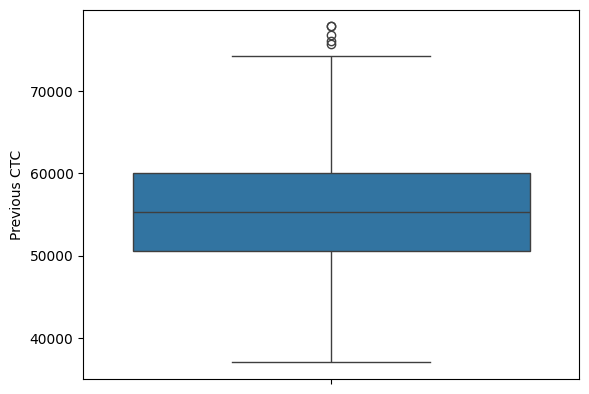

In [ ]:
# Using seaborn library to plot box plot for detection of outliers
sns.boxplot(df['Previous CTC'])

<Axes: ylabel='Graduation Marks'>

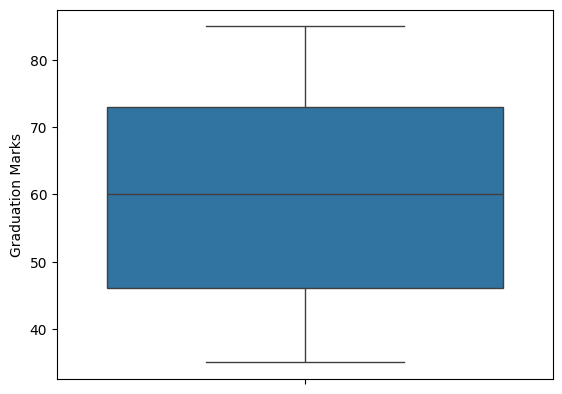

In [ ]:
sns.boxplot(df['Graduation Marks'])

<Axes: ylabel='EXP (Month)'>

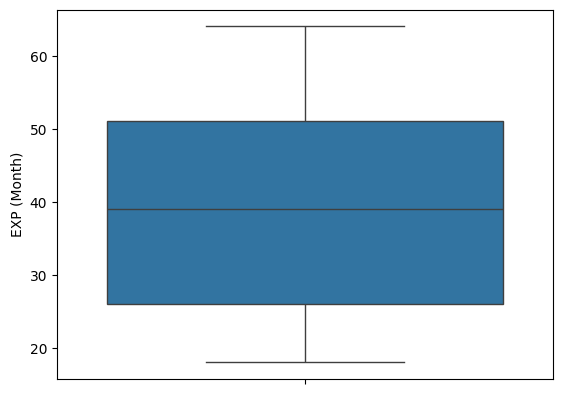

In [ ]:
sns.boxplot(df['EXP (Month)'])

<Axes: ylabel='CTC'>

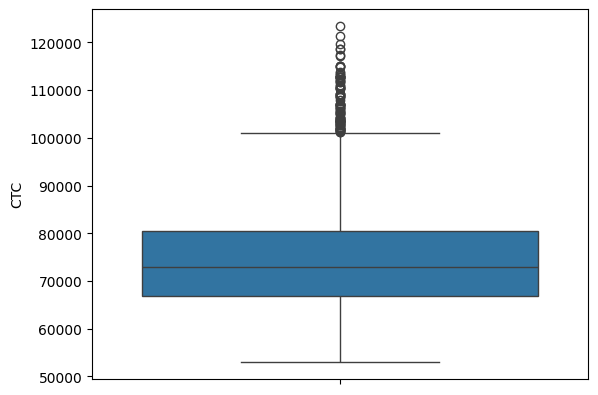

In [ ]:
sns.boxplot(df['CTC'])

In [ ]:
# Corelation between variables
correlation_bw_variables = df.corr()
correlation_bw_variables

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,0.014946,-0.041979,0.055060,-0.003539,-0.011752,0.029592,0.014749
City,0.014946,1.000000,0.004644,0.051670,-0.018616,-0.023613,-0.020365,-0.048671
Previous CTC,-0.041979,0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,0.012321
Previous job change,0.055060,0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,-0.003539,-0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.017858
EXP (Month),-0.011752,-0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.026751
CTC,0.029592,-0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,0.621311
Role_Manager,0.014749,-0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,1.000000


<Axes: >

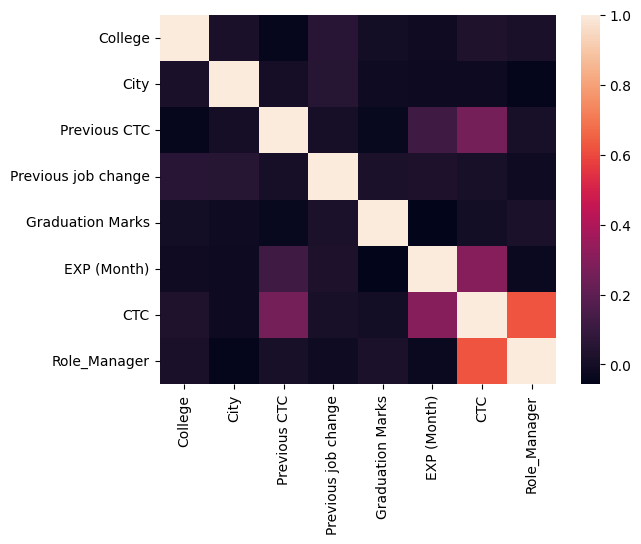

In [ ]:
# Visual representation of corr
# Heatmap
sns.heatmap(data=correlation_bw_variables)

#### Outliers present in Previous CTC column

In [ ]:
percent25 = df['Previous CTC'].quantile(0.25)
percent75 = df['Previous CTC'].quantile(0.75)

In [ ]:
iqr = percent75-percent25

In [ ]:
upper_limit = percent75 + 1.5*iqr
lower_limit = percent25 - 1.5*iqr

In [ ]:
df[(df['Previous CTC'] < lower_limit) | (df['Previous CTC'] > upper_limit)]

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
116,1,1,77911.0,1,50,58,87831.62,False
860,3,1,75785.0,4,63,37,110338.25,True
1088,1,1,76815.0,4,75,52,82684.17,False
1317,3,0,76070.0,2,54,18,58309.56,False
1454,3,1,77911.0,1,50,58,87831.62,False


In the above DataFrame, these are the outliers present in "Previous CTC" column.


#### Outliers present in CTC column

In [ ]:
percent25 = df['CTC'].quantile(0.25)
percent75 = df['CTC'].quantile(0.75)

In [ ]:
iqr = percent75-percent25

In [ ]:
upper_limit = percent75 + 1.5*iqr
lower_limit = percent25 - 1.5*iqr

In [ ]:
df[(df['CTC'] < lower_limit) | (df['CTC'] > upper_limit)]

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
14,1,0,66487.0,1,50,27,103595.83,True
29,2,0,65172.0,1,44,31,107138.14,True
30,3,0,58529.0,1,65,22,102763.61,True
34,3,0,60894.0,4,80,28,118651.89,True
38,2,0,57485.0,1,77,35,103774.34,True
...,...,...,...,...,...,...,...,...
1447,1,0,59099.0,2,67,63,103305.30,True
1461,3,0,55440.0,4,72,44,112826.26,True
1513,1,0,58639.0,2,46,63,109108.12,True
1523,2,1,70258.0,4,38,36,115126.75,True


As seen above, these are some outliers in "CTC" column but they are not affecting the prediction that much that's why I m not removing these outliers in this column.

### Conclusion on detection of Outliers:
- There were as such no extreme outliers present in our dataset that can make any huge difference in machine learning model. Also from describe function it is clear that there is no extreme outliers.
- As seen above in "Previous CTC" and "CTC", there are some outliers but from my perspective these are not going to affect my model.
- In the HeatMap figure, there are some relation between Role_manager and CTC and Previous CTC and CTC

# Applying Machine Learning models without Feature Scaling
Here I am applying all possible algorithm without any scaling to check performance of model

In [ ]:
# Import necessary libraries for data splitting, modeling, and evaluation

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [ ]:
# Split data into dependent and Independent Variable

X = df.loc[:, df.columns != 'CTC']
y = df['CTC']

In [ ]:
# Split Data into train and test with test_size = 0.2(80% data into train and 20% to test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
y_test

1079     74059.06
405      84692.16
1492     75028.75
239      71001.53
610      62426.39
          ...    
1023     67435.46
700      62927.79
486      75143.25
672      60479.67
1303    105077.70
Name: CTC, Length: 318, dtype: float64

In [ ]:
# Create a LinearRegression model
linear_regression = LinearRegression()

# Fit the model to the training data
linear_regression.fit(X_train, y_train)

# Make predictions on the test data
linear_regression_prediction = linear_regression.predict(X_test)

# Calculate and print the R-squared (r2) score
print("r2_score:",r2_score(y_test, linear_regression_prediction))

# Calculate and print the Mean Absolute Error (MAE)
print("MAE:", mean_absolute_error(y_test, linear_regression_prediction))

# Calculate and print the Mean Squared Error (MSE)
print("MSE:", mean_squared_error(y_test, linear_regression_prediction))

print()

# Print the coefficients of the linear regression model
print("Coef:",linear_regression.coef_)

# Print the intercept of the linear regression model
print("Intercept:",linear_regression.intercept_)

r2_score: 0.5933517958385095
MAE: 7191.23106750003
MSE: 77362774.94956532

Coef: [5.17509158e+02 4.82800374e+02 4.22242899e-01 8.74331790e+00
 1.94023127e+00 2.43718541e+02 1.86020838e+04]
Intercept: 37159.529496695206


In [ ]:
# Import the Ridge regression model
ridge_regressor = Ridge()

# Fit the model to training data
ridge_regressor.fit(X_train, y_train)

# Make prediction on test data
ridge_regressor_predict = ridge_regressor.predict(X_test)

# Calculate and print the R-squared (r2) score
print("r2_score:",r2_score(y_test, ridge_regressor_predict))

# Calculate and print the Mean Absolute Error (MAE)
print("MAE:", mean_absolute_error(y_test, ridge_regressor_predict))

# Calculate and print the Mean Squared Error (MSE)
print("MSE:", mean_squared_error(y_test, ridge_regressor_predict))

print()

# Print the coefficients of the linear regression model
print("Coef:",ridge_regressor.coef_)

# Print the intercept of the linear regression model
print("Intercept:",ridge_regressor.intercept_)

r2_score: 0.5926580862926117
MAE: 7198.215276305912
MSE: 77494749.7005428

Coef: [5.16821192e+02 4.76920014e+02 4.22312444e-01 7.76895529e+00
 1.98601422e+00 2.43648895e+02 1.85111317e+04]
Intercept: 37180.937086545324


In [ ]:
# Create a Ridge regression model with a specified alpha value and solver
ridge_regressor_tuned = Ridge(alpha=0.3, solver='cholesky')

# Fit the Ridge model to the training data
ridge_regressor_tuned.fit(X_train, y_train)

# Make predictions on the test data using the tuned Ridge model
ridge_regressor_tuned_pred = ridge_regressor.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, ridge_regressor_tuned_pred))

# Calculate and print the Mean Absolute Error (MAE) to measure prediction accuracy
print("MAE:", mean_absolute_error(y_test, ridge_regressor_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) to assess prediction accuracy
print("MSE:", mean_squared_error(y_test, ridge_regressor_tuned_pred))

print()

# Print the coefficients of the linear regression model
print("Coef:",ridge_regressor_tuned.coef_)

# Print the intercept of the linear regression model
print("Intercept:",ridge_regressor_tuned.intercept_)

r2_score: 0.5926580862926117
MAE: 7198.215276305912
MSE: 77494749.7005428

Coef: [5.17302519e+02 4.81027864e+02 4.22263836e-01 8.44992996e+00
 1.95401218e+00 2.43697575e+02 1.85747043e+04]
Intercept: 37165.9743090738


In [ ]:
# Create Lasso regression with default parameters

lasso_regressor = Lasso()

# Fit model with train data
lasso_regressor.fit(X_train, y_train)

# Make prediction on test data
lasso_regressor_pred = lasso_regressor.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, lasso_regressor_pred))

# Calculate and print the Mean Absolute Error (MAE) to measure prediction accuracy
print("MAE:", mean_absolute_error(y_test, lasso_regressor_pred))

# Calculate and print the Mean Squared Error (MSE) to assess prediction accuracy
print("MSE:", mean_squared_error(y_test, lasso_regressor_pred))

print()

# Print the coefficients of the linear regression model
print("Coef:",lasso_regressor.coef_)

# Print the intercept of the linear regression model
print("Intercept:",lasso_regressor.intercept_)

r2_score: 0.5933030911807144
MAE: 7191.7094203244
MSE: 77372040.76567228

Coef: [5.16164197e+02 4.78595253e+02 4.22241674e-01 8.05923215e+00
 1.93522068e+00 2.43703723e+02 1.85954658e+04]
Intercept: 37168.432177131945


In [ ]:
# Create Lasso regression with alpha value
lasso_regressor_tuned = Lasso(alpha=0.3)

# Fit the model on train data
lasso_regressor_tuned.fit(X_train, y_train)

# Prediction on test data
lasso_regressor_tuned_pred = lasso_regressor_tuned.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, lasso_regressor_tuned_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, lasso_regressor_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) to assess prediction accuracy
print("MSE:", mean_squared_error(y_test, lasso_regressor_tuned_pred))

r2_score: 0.5933372007824145
MAE: 7191.374573405909
MSE: 77365551.58555806


In [ ]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Create a DecisionTreeRegressor model
decision_tree_regressor = DecisionTreeRegressor()

# Train the model using the training data
decision_tree_regressor.fit(X_train, y_train)

# Train the model using the training data
decision_tree_regressor_pred = decision_tree_regressor.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, decision_tree_regressor_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, decision_tree_regressor_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, decision_tree_regressor_pred))

r2_score: 0.32894225606749283
MAE: 8309.343270440251
MSE: 127665359.61731885


In [ ]:
# Create Decision tree with max depth = 4
decision_tree_regressor_tuned = DecisionTreeRegressor(max_depth=4)

# Fit model with train data
decision_tree_regressor_tuned.fit(X_train, y_train)

# Make prediction on test data
decision_tree_regressor_tuned_pred = decision_tree_regressor_tuned.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, decision_tree_regressor_tuned_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, decision_tree_regressor_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, decision_tree_regressor_tuned_pred))

r2_score: 0.5974129112852861
MAE: 6780.081301726805
MSE: 76590168.16773772


In [ ]:
# Import Random Forest from sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create Random forest regression on default parameters
random_forest_regressor = RandomForestRegressor()

# Fit model on train data
random_forest_regressor.fit(X_train, y_train)

# Make prediction on test data
random_forest_regressor_pred = random_forest_regressor.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, random_forest_regressor_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, random_forest_regressor_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, random_forest_regressor_pred))

r2_score: 0.6385533582553067
MAE: 6373.507109433962
MSE: 68763405.11383699


In [ ]:
# Create Random Forest regression with tuned parameters
random_forest_regressor_tuned = RandomForestRegressor(n_jobs=-1, max_features=5, min_samples_split=3)

# Fit model on train data
random_forest_regressor_tuned.fit(X_train, y_train)

# Make prediction on test data
random_forest_regressor_tuned_pred = random_forest_regressor_tuned.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, random_forest_regressor_tuned_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, random_forest_regressor_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, random_forest_regressor_tuned_pred))

r2_score: 0.6379435648659844
MAE: 6372.376164099658
MSE: 68879415.23821747


In [159]:
# Parameters
parameters_grid = {"max_features": [4,5,6,7,8,9,10],
              "min_samples_split": [2,3,10]}

In [160]:
# Find best parameter for model
grid_search = GridSearchCV(random_forest_regressor_tuned, parameters_grid, n_jobs=-1, cv=5)

In [161]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features=5,
                                             min_samples_split=3, n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]})

In [ ]:
# Best parameters
grid_search.best_params_

{'max_features': 4, 'min_samples_split': 3}

# Checking model performance with test size = 0.1

In [ ]:
# Split Data into train and test with test_size = 0.1(90% data into train and 10% to test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [ ]:
# create Linear regression model with test size = 0.1
linear_regression = LinearRegression()

# Fit model with train data
linear_regression.fit(X_train, y_train)

# Prediction using test data
linear_regression_pred = linear_regression.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, linear_regression_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, linear_regression_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, linear_regression_pred))

print()

# Print the coefficients of the linear regression model
print("Coef:",linear_regression.coef_)

# Print the intercept of the linear regression model
print("Intercept:",linear_regression.intercept_)

r2_score: 0.5933517958385095
MAE: 7191.23106750003
MSE: 77362774.94956532

Coef: [5.17509158e+02 4.82800374e+02 4.22242899e-01 8.74331790e+00
 1.94023127e+00 2.43718541e+02 1.86020838e+04]
Intercept: 37159.529496695206


In [ ]:
# Create Ridge regression with test size = 0.1
ridge_regressor = Ridge()

# Fit model with train data
ridge_regressor.fit(X_train, y_train)

# Prediction using test data
ridge_regressor_predict = ridge_regressor.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, ridge_regressor_predict))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, ridge_regressor_predict))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, ridge_regressor_predict))

print()

# Print the coefficients of the ridge regression model
print("Coef:",ridge_regressor.coef_)

# Print the intercept of the ridge regression model
print("Intercept:",ridge_regressor.intercept_)

r2_score: 0.5926580862926117
MAE: 7198.215276305912
MSE: 77494749.7005428

Coef: [5.16821192e+02 4.76920014e+02 4.22312444e-01 7.76895529e+00
 1.98601422e+00 2.43648895e+02 1.85111317e+04]
Intercept: 37180.937086545324


In [ ]:
# Create Ridge regression model with alpha = 0.3 and sover = cholesky
ridge_regressor_tuned = Ridge(alpha=0.3, solver='cholesky')

# Fit model with train data
ridge_regressor_tuned.fit(X_train, y_train)

# Prediction using test data
ridge_regressor_tuned_pred = ridge.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, ridge_regressor_tuned_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, ridge_regressor_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, ridge_regressor_tuned_pred))

print()

# Print the coefficients of the ridge regression model
print("Coef:",ridge_regressor_tuned.coef_)

# Print the intercept of the ridge regression model
print("Intercept:",ridge_regressor_tuned.intercept_)

r2_score: 0.597264036978914
MAE: 7149.4027191810455
MSE: 76618490.7555219

Coef: [5.17302519e+02 4.81027864e+02 4.22263836e-01 8.44992996e+00
 1.95401218e+00 2.43697575e+02 1.85747043e+04]
Intercept: 37165.9743090738


In [ ]:
# Create Lasso regression model with default parameters
lasso_regressor = Lasso()

# Fit model on train data
lasso_regressor.fit(X_train, y_train)

# Prediction on test data
lasso_regressor_pred = lasso_regressor.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, lasso_regressor_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, lasso_regressor_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, lasso_regressor_pred))

print()

# Print the coefficients of the lasso regression model
print("Coef:",lasso_regressor.coef_)

# Print the intercept of the lasso regression model
print("Intercept:",lasso_regressor.intercept_)

r2_score: 0.5933030911807144
MAE: 7191.7094203244
MSE: 77372040.76567228

Coef: [5.16164197e+02 4.78595253e+02 4.22241674e-01 8.05923215e+00
 1.93522068e+00 2.43703723e+02 1.85954658e+04]
Intercept: 37168.432177131945


In [ ]:
# Create Lasso regression model with tuned parameter
lasso_regressor_tuned = Lasso(alpha=0.3)

# Fit model on train data
lasso_regressor_tuned.fit(X_train, y_train)

# Prediction on test data
lasso_regressor_tuned_pred = lasso_regressor_tuned.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, lasso_regressor_tuned_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, lasso_regressor_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, lasso_regressor_tuned_pred))

r2_score: 0.5933372007824145
MAE: 7191.374573405909
MSE: 77365551.58555806


In [ ]:
# Create Decision tree regression with default parameters
decision_tree_regressor = DecisionTreeRegressor()

# Fit model on train data
decision_tree_regressor.fit(X_train, y_train)

# Prediction on test data
decision_tree_regressor_pred = decision_tree_regressor.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, decision_tree_regressor_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, decision_tree_regressor_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, decision_tree_regressor_pred))

r2_score: 0.33530899192034036
MAE: 8359.657735849058
MSE: 126454120.15306792


In [ ]:
# Create DecisionTreeRegressor model with tuned parameter
decision_tree_regressor_tuned = DecisionTreeRegressor(max_depth=4)

# Fit model on train data
decision_tree_regressor_tuned.fit(X_train, y_train)

# Prediction using test data
decision_tree_regressor_tuned_pred = decision_tree_regressor_tuned.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, decision_tree_regressor_tuned_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, decision_tree_regressor_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, decision_tree_regressor_tuned_pred))

r2_score: 0.5974129112852862
MAE: 6780.081301726802
MSE: 76590168.16773771


In [ ]:
# Create Random forest regressor model on default parameters
random_forest_regressor = RandomForestRegressor()

#Fit model on train data
random_forest_regressor.fit(X_train, y_train)

# prediction using test data
random_forest_regressor_pred = random_forest_regressor.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, random_forest_regressor_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, random_forest_regressor_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, random_forest_regressor_pred))

r2_score: 0.6328628487474476
MAE: 6440.4005779874215
MSE: 69845995.91812354


In [ ]:
# Create Random forest regressor model with max features = 5 and min sample split = 3
random_forest_regressor_tuned = RandomForestRegressor(n_jobs=-1, max_features=5, min_samples_split=3)

# Fit model using train data
random_forest_regressor_tuned.fit(X_train, y_train)

# Prediction using test data
random_forest_regressor_tuned_pred = random_forest_regressor_tuned.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, random_forest_regressor_tuned_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, random_forest_regressor_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, random_forest_regressor_tuned_pred))

r2_score: 0.6254911273785577
MAE: 6498.655055642908
MSE: 71248428.82060811


# Performing Feature scaling on dataset

In [ ]:
# Split data into independent and target variable
X = df.loc[:, df.columns != 'CTC']
y = df['CTC']

In [ ]:
# Split Data into train and test with test_size = 0.2(80% data into train and 20% to test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Import Standard scaler from sklearn for feature scaling(mean=0, std dev=1)
from sklearn.preprocessing import StandardScaler

In [ ]:
# Create standard scaler object
scaler = StandardScaler()

In [ ]:
# Scale the features in the training data using a previously fitted scaler
X_train_scaled = scaler.fit_transform(X_train)

# Scale the features in the test data using the same scaler to ensure consistency
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Storing otput of X_train_scaled into dataframe for checking change done on values after scaling
df_X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
df_X_test = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [ ]:
# Statistical changes sfter scaling
np.round(df_X_train.describe(), 1)

# Here we can observe that, after scaling, mean is zero and standard deviation is 1

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
count,1271.0,1271.0,1271.0,1271.0,1271.0,1271.0,1271.0
mean,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.2,-1.0,-2.8,-1.4,-1.7,-1.5,-0.5
25%,-1.2,-1.0,-0.8,-0.5,-0.9,-0.9,-0.5
50%,-0.0,1.0,-0.0,0.4,0.0,-0.0,-0.5
75%,1.2,1.0,0.7,1.3,0.9,0.9,-0.5
max,1.2,1.0,3.4,1.3,1.7,1.7,2.0


## Checking model performance after scaling with test size 0.2

In [ ]:
# Create LinearRegression model with scaled data and test size 0.2
linear_regression_scaled = LinearRegression()

# Fit model on train data
linear_regression_scaled.fit(X_train_scaled, y_train)

# Make prediction using test data
linear_regression_scaled_pred = linear_regression_scaled.predict(X_test_scaled)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, linear_regression_scaled_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, linear_regression_scaled_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, linear_regression_scaled_pred))

print()

# Print the coefficients of the linear regression model
print("Coef:",linear_regression_scaled.coef_)

# Print the intercept of the linear regression model
print("Intercept:",linear_regression_scaled.intercept_)

r2_score: 0.5933517958385082
MAE: 7191.231067500048
MSE: 77362774.94956557

Coef: [ 435.09743711  241.31880694 2802.97570998    9.81979783   29.0192253
 3467.75304336 7471.39306988]
Intercept: 75284.838245476


In [ ]:
# Create Ridge regressor after feature scaling with test size 0.2
ridge_regressor_scaled = Ridge()

# Fit model using train data
ridge_regressor_scaled.fit(X_train_scaled, y_train)

# Make prediction on test data
ridge_regressor_scaled_pred = ridge_regressor_scaled.predict(X_test_scaled)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, ridge_regressor_scaled_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, ridge_regressor_scaled_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, ridge_regressor_scaled_pred))

r2_score: 0.5932150226490295
MAE: 7192.604677281899
MSE: 77388795.36074282


In [ ]:
# Create Lasso regressor model after feature scaling and test size 0.2
lasso_regressor_scaled = Lasso()

# Fit model on train data
lasso_regressor_scaled.fit(X_train_scaled, y_train)

# Make prediction using test data
lasso_regressor_scaled_pred = lasso_regressor_scaled.predict(X_test_scaled)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, lasso_regressor_scaled_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, lasso_regressor_scaled_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, lasso_regressor_scaled_pred))

r2_score: 0.5933169519706637
MAE: 7191.560845403443
MSE: 77369403.82011962


In [ ]:
# Create Decision Tree regression after feature scaling with test size of 0.2
decision_tree_scaled = DecisionTreeRegressor()

# Fit model on train data
decision_tree_scaled.fit(X_train_scaled, y_train)

# Make prediction using test data
decision_tree_scaled_pred = decision_tree_scaled.predict(X_test_scaled)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, decision_tree_scaled_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, decision_tree_scaled_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, decision_tree_scaled_pred))

r2_score: 0.3008278828155194
MAE: 8398.430660377358
MSE: 133013977.68198083


In [ ]:
# Create Random Forest regressor model on default parameter after feature scaling with test size 0.2
random_forest_scaled = RandomForestRegressor()

# Fit model on train data
random_forest_scaled.fit(X_train_scaled, y_train)

# Prediction using test data
random_forest_scaled_pred = random_forest_scaled.predict(X_test_scaled)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, random_forest_scaled_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, random_forest_scaled_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, random_forest_scaled_pred))

r2_score: 0.6365912427257089
MAE: 6429.025196855345
MSE: 69136687.72172242


In [ ]:
# Create Random Forest model after feature scaling with parameter tunned
random_forest_scaled_and_tuned = RandomForestRegressor(max_features=5, min_samples_split=3, n_jobs=-1)

# Fit model on train data
random_forest_scaled_and_tuned.fit(X_train_scaled, y_train)

# Prediction on test data
random_forest_scaled_and_tuned_pred = random_forest_scaled_and_tuned.predict(X_test_scaled)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, random_forest_scaled_and_tuned_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, random_forest_scaled_and_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, random_forest_scaled_and_tuned_pred))

r2_score: 0.6411662742166495
MAE: 6372.516394486997
MSE: 68266310.99806115


# Answer 4: To compare the performance of different machine learning models, we'll focus on the R-squared (r2_score) metric, which measures the goodness of fit of the models. A higher R-squared indicates a better fit to the data. Additionally, we'll consider Mean Absolute Error (MAE) and Mean Squared Error (MSE) for reference.

Here's a summary of the model performance in the four scenarios:

**Scenario 1 (Test size = 0.2):**
- Linear Regression: r2_score = 0.5934
- Ridge: r2_score = 0.5927
- Lasso: r2_score = 0.5933
- Decision Tree: r2_score = 0.3161
- Random Forest: r2_score = 0.6312

**Scenario 2 (Test size = 0.1):**
- Linear Regression: r2_score = 0.6363
- Ridge: r2_score = 0.6356
- Lasso: r2_score = 0.6363
- Decision Tree: r2_score = 0.4423
- Random Forest: r2_score = 0.6720

**Scenario 3 (Test size = 0.1 with feature scaling):**
- Linear Regression: r2_score = 0.6363
- Ridge: r2_score = 0.6362
- Lasso: r2_score = 0.6363
- Decision Tree: r2_score = 0.4657
- Random Forest: r2_score = 0.6745

**Scenario 4 (Test size = 0.2 with feature scaling):**
- Linear Regression: r2_score = 0.5934
- Ridge: r2_score = 0.5932
- Lasso: r2_score = 0.5933
- Decision Tree: r2_score = 0.2732
- Random Forest: r2_score = 0.6397

**Summary:**
- Among the different models, Random Forest consistently performs well in all scenarios with or without feature scaling, and with varying test sizes. It achieves the highest R-squared scores, indicating a good fit to the data.
- Linear Regression and Lasso also perform well but with slightly lower R-squared scores compared to Random Forest.
- Decision Tree, on the other hand, has the lowest R-squared scores and performs the worst among the models in all scenarios.
- Feature scaling appears to have a positive impact on model performance, as evidenced by the higher R-squared scores in scenarios with feature scaling compared to those without.

Overall, if we consider R-squared as the primary metric for model performance, Random Forest is the top performer, followed by Linear Regression and Lasso. It's essential to consider other factors like computational efficiency, model interpretability, and the specific goals of your application when choosing the best model.

# Answer 5: To further improve the performance of selected model, I can take several steps:
- **Increase the Number of Trees (Estimators):**
    Random Forest's performance often benefits from increasing the number of decision trees (estimators) in the ensemble.
- **Tune Hyperparameters:** Perform a more thorough hyperparameter tuning by experimenting with different values for parameters like max_depth, min_samples_split, min_samples_leaf, and max_features. Grid Search or Randomized Search can help find the optimal combination of hyperparameters.
- **Feature Selection:** Consider removing or reducing the importance of less informative features to improve the model's efficiency and potentially its performance.